# Loading the libraries

In [80]:

import pandas as pd
from matplotlib import pyplot
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

#Loading the Dataset

In [81]:
big_df = pd.read_csv("/content/all_data_historic.csv", header=0)
big_df.shape

(11900, 30)

In [82]:
big_df.drop(['polarity', 'subjectivity'], axis=1, inplace=True)

In [83]:
df = pd.read_csv("/content/sentiment.csv", header=0)
df.shape

(1190, 3)

# Analysing the  Dataset

In [84]:
df

,Date,polarity,subjectivity
0,1/7/2019,0.211240,0.341574
1,2/7/2019,0.246338,0.319595
2,3/7/2019,0.181414,0.066015
3,4/7/2019,0.163393,0.218119
4,5/7/2019,0.050206,0.075301
...,...,...,...
1185,28/9/2022,0.087345,0.416711
1186,29/9/2022,0.072305,0.430498
1187,30/9/2022,0.071084,0.427040
1188,1/10/2022,0.065221,0.423666


In [85]:
concat_df = pd.concat([df, df, df, df, df, df, df, df, df, df], axis=0)

In [86]:
concat_df

,Date,polarity,subjectivity
0,1/7/2019,0.211240,0.341574
1,2/7/2019,0.246338,0.319595
2,3/7/2019,0.181414,0.066015
3,4/7/2019,0.163393,0.218119
4,5/7/2019,0.050206,0.075301
...,...,...,...
1185,28/9/2022,0.087345,0.416711
1186,29/9/2022,0.072305,0.430498
1187,30/9/2022,0.071084,0.427040
1188,1/10/2022,0.065221,0.423666


## Dropping Certain columns

In [87]:
concat_df.drop(['Date'], axis=1, inplace=True)

In [88]:
concat_df = concat_df.reset_index()

In [89]:
concat_df.drop(['index'], axis=1, inplace=True)

In [90]:
concat_df

,polarity,subjectivity
0,0.211240,0.341574
1,0.246338,0.319595
2,0.181414,0.066015
3,0.163393,0.218119
4,0.050206,0.075301
...,...,...
11895,0.087345,0.416711
11896,0.072305,0.430498
11897,0.071084,0.427040
11898,0.065221,0.423666


In [91]:
final_df = pd.concat([big_df, concat_df], axis=1)

In [92]:
for col in ['Close_return', 'Close_sma_3', 'Close_ema_3', 'Close_std_3',
            'Close_sma_7','Close_ema_7', 'Close_std_7', 'Close_sma_20','Close_ema_20', 
            'Close_std_20', 'Close_mtd', 'Close_ytd', 'max_corr_coin_return', 'min_corr_coin_return']:
    final_df[col].fillna(value=final_df[col].mean(), inplace=True)

# Seeing the modified Columns

In [93]:
final_df

,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume,Coin,Close_return,...,Close_std_20,Year,Month,Close_mtd,Close_ytd,max_corr_coin_return,min_corr_coin_return,target,polarity,subjectivity
0,0,1/7/2019,10796.930660,11206.439450,10089.314450,10583.134770,10583.134770,2.937859e+10,BTC,0.002897,...,0.049879,2019,7,3.792117,-0.834313,0.002986,0.002118,1,0.211240,0.341574
1,1,2/7/2019,10588.683590,10912.188480,9737.884766,10801.677730,10801.677730,3.101590e+10,BTC,0.020650,...,0.049879,2019,7,0.000000,0.000000,-0.006963,-0.012424,1,0.246338,0.319595
2,2,3/7/2019,10818.156250,11968.078130,10818.156250,11961.269530,11961.269530,3.079649e+10,BTC,0.107353,...,0.049879,2019,7,4.198660,4.198660,0.039450,-0.014005,0,0.181414,0.066015
3,3,4/7/2019,11972.718750,12006.075200,11166.569340,11215.437500,11215.437500,2.592029e+10,BTC,-0.062354,...,0.049879,2019,7,-4.019543,-4.019543,-0.061289,0.052717,0,0.163393,0.218119
4,4,5/7/2019,11203.102540,11395.661130,10874.964840,10978.459960,10978.459960,2.383848e+10,BTC,-0.021130,...,0.049879,2019,7,-2.023219,-2.023219,0.012211,-0.016318,1,0.050206,0.075301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11895,1185,28/9/2022,52.730122,53.664368,51.357903,53.308426,53.308426,4.790784e+08,LTC,0.010830,...,0.069030,2022,9,-0.554154,-0.620623,0.016544,-0.002583,1,0.087345,0.416711
11896,1186,29/9/2022,53.307693,53.956154,52.447205,53.914047,53.914047,4.063915e+08,LTC,0.011361,...,0.069967,2022,9,-0.532325,-0.602048,0.007532,0.019684,0,0.072305,0.430498
11897,1187,30/9/2022,53.914841,54.988789,53.031113,53.397038,53.397038,4.126045e+08,LTC,-0.009590,...,0.070175,2022,9,-1.394763,-1.335909,-0.007217,-0.003361,0,0.071084,0.427040
11898,1188,1/10/2022,53.403042,53.709396,52.705292,52.906868,52.906868,2.569141e+08,LTC,-0.009180,...,0.070223,2022,10,-441.835719,-1.321554,-0.006160,-0.016468,0,0.065221,0.423666


In [94]:
final_df['Coin'].unique()

array(['BTC', 'ETH', 'BNB', 'XRP', 'ADA', 'DOGE', 'MATIC', 'TRX', 'LEO',
       'LTC'], dtype=object)

# Grouping the Coins

In [95]:
btc_df = final_df[final_df['Coin']=='BTC'].reset_index()
eth_df = final_df[final_df['Coin']=='ETH'].reset_index()
bnb_df = final_df[final_df['Coin']=='BNB'].reset_index()
xrp_df = final_df[final_df['Coin']=='XRP'].reset_index()
ada_df = final_df[final_df['Coin']=='ADA'].reset_index()
doge_df = final_df[final_df['Coin']=='DOGE'].reset_index()
matic_df = final_df[final_df['Coin']=='MATIC'].reset_index()
trx_df = final_df[final_df['Coin']=='TRX'].reset_index()
leo_df = final_df[final_df['Coin']=='LEO'].reset_index()
ltc_df = final_df[final_df['Coin']=='LTC'].reset_index()

## Splitting the respective coins into training and test set

In [96]:
btc_train = btc_df[0:824] #01-07-2019 to 01-10-2021
btc_test = btc_df[824::] #02-10-2021 to 02-10-2022

eth_train = eth_df[0:824]
eth_test = eth_df[824::]

bnb_train = bnb_df[0:824]
bnb_test = bnb_df[824::]

xrp_train = xrp_df[0:824]
xrp_test = xrp_df[824::]

ada_train = ada_df[0:824]
ada_test = ada_df[824::]

doge_train = doge_df[0:824]
doge_test = doge_df[824::]

matic_train = matic_df[0:824]
matic_test = matic_df[824::]

trx_train = trx_df[0:824]
trx_test = trx_df[824::]

leo_train = leo_df[0:824]
leo_test = leo_df[824::]

ltc_train = ltc_df[0:824]
ltc_test = ltc_df[824::]

## Selecting the feature

In [97]:
features = ['Date', 'Open', 'Close', 'High', 'Low', 'Close_return', 'Close_sma_3', 'Close_sma_7', 'Close_sma_20',
            'Close_ema_3', 'Close_ema_7', 'Close_ema_20', 'Close_std_3', 'Close_std_7', 'Close_std_20',
            'Close_mtd', 'Close_ytd', 'max_corr_coin_return', 'min_corr_coin_return', 'target', 'polarity', 'subjectivity']

In [98]:
btc_train = btc_train[features]
btc_test = btc_test[features]

eth_train = eth_train[features]
eth_test = eth_test[features]

bnb_train = bnb_train[features]
bnb_test = bnb_test[features]

xrp_train = xrp_train[features]
xrp_test = xrp_test[features]

ada_train = ada_train[features]
ada_test = ada_test[features]

doge_train = doge_train[features]
doge_test = doge_test[features]

matic_train = matic_train[features]
matic_test = matic_test[features]

trx_train = trx_train[features]
trx_test = trx_test[features]

leo_train = leo_train[features]
leo_test = leo_test[features]

#Finding thevalue of p,q,d of ARIMA

## Finding the d value

In [99]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(btc_train['Close'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))

ADF Statistic: -0.415989
p-value: 0.907395
Critical Values:
	1%: -3.439
	5%: -2.865
	10%: -2.569


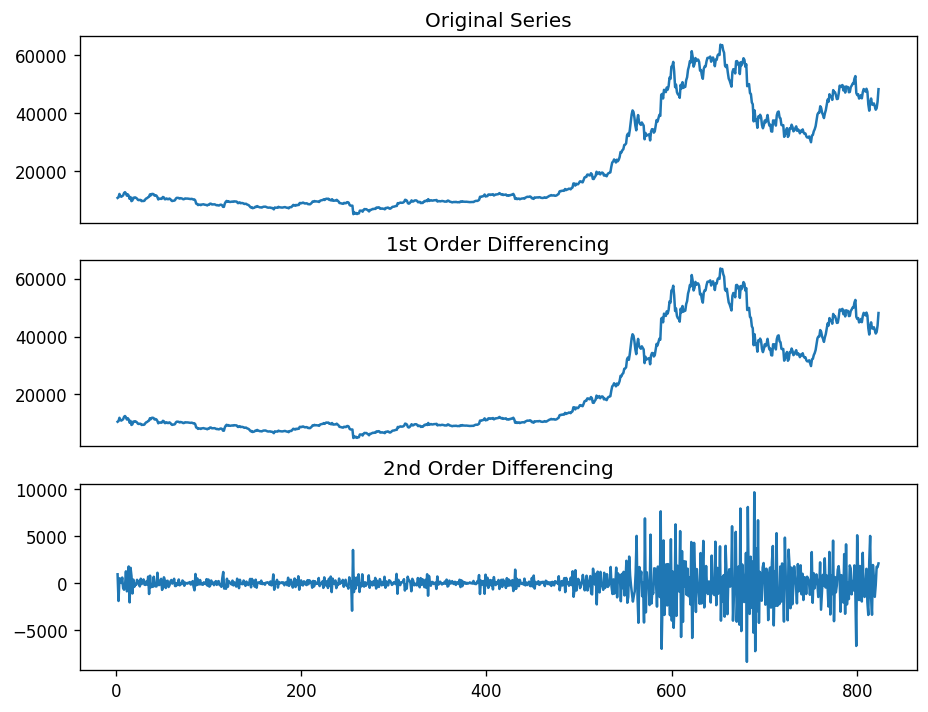

In [100]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})
 
# Original Series
fig, (ax1, ax2, ax3) = plt.subplots(3)
ax1.plot(btc_train.Close); ax1.set_title('Original Series'); ax1.axes.xaxis.set_visible(False)
# 1st Differencing
ax2.plot(btc_train.Close); ax2.set_title('1st Order Differencing'); ax2.axes.xaxis.set_visible(False)
# 2nd Differencing
ax3.plot(btc_train.Close.diff().diff()); ax3.set_title('2nd Order Differencing')
plt.show()

## Finding the p value

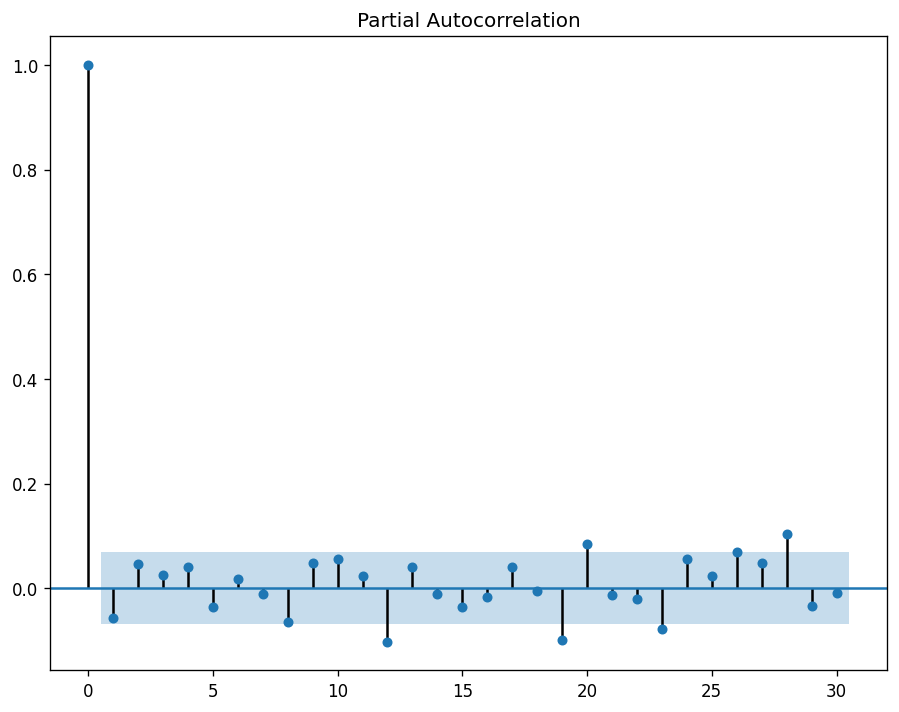

In [101]:
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
plot_pacf(btc_train.Close.diff().dropna())
plt.rcParams["figure.figsize"] = (3,3)

## Finding the q value

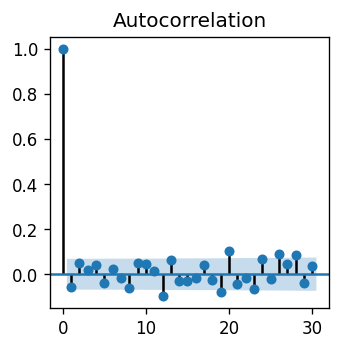

In [102]:
plot_acf(btc_train.Close.diff().dropna())
plt.rcParams["figure.figsize"] = (5,3)

# Coin1:Bitcoin

In [103]:
from statsmodels.tsa.arima_model import ARIMA
features=['Open', 'Close_return', 'High', 'Low','max_corr_coin_return', 'min_corr_coin_return', 'polarity', 'subjectivity','Close_sma_3', 'Close_sma_7', 'Close_sma_20',
            'Close_ema_3', 'Close_ema_7']
modelall=ARIMA(endog=btc_train['Close'],order=(4,1,4),exog=btc_train[features])
fitted = modelall.fit(disp=-1) 
# Forecast
fc, se, conf = fitted.forecast(366,exog=btc_test[features] ,alpha=0.05)  # 95% conf

In [104]:
r1=list()

def classify(ls):
  r1.append(0)
  for i in range(len(ls)-1):
    if ls[i] <ls[i+1]:
      r1.append(1)
    else:
      r1.append(0)
  return r1
result_c=classify(fc)


In [105]:
fc.shape

(366,)

In [106]:
from sklearn.metrics import classification_report

In [107]:
report = classification_report(btc_test['target'], result_c, output_dict=True)

In [108]:
classes = ['Up', 'Down']
metrics = ['Precision', 'Recall', 'F1 Score']
res = pd.DataFrame(columns = pd.MultiIndex.from_product([classes, metrics], names=['Direction', 'Metric']))
res['Coin'] = ''
res['Weighted Avg F1'] = np.nan
vals = [report['0']['precision'], report['0']['recall'], report['0']['f1-score'], 
                    report['1']['precision'], report['1']['recall'], report['1']['f1-score'], 
                    'BTC', report['weighted avg']['f1-score']]
res = res.append(dict(zip(res.columns, vals)), ignore_index=True)

In [109]:
btc=res

# Coin2 : ETH

In [110]:
from statsmodels.tsa.arima_model import ARIMA
features=['Open', 'Close_return', 'High', 'Low','max_corr_coin_return', 'min_corr_coin_return', 'polarity', 'subjectivity','Close_sma_3', 'Close_sma_7', 'Close_sma_20',
            'Close_ema_3', 'Close_ema_7']
modelall=ARIMA(endog=eth_train['Close'],order=(1,2,1),exog=eth_train[features])
fitted = modelall.fit(disp=-1) 
# Forecast
fc, se, conf = fitted.forecast(366,exog=eth_test[features] ,alpha=0.05)  # 95% conf

In [111]:
resu = fc.mean()

In [112]:
r_eth=list()

def classify_eth(ls):
  r_eth.append(0)
  for i in range(len(ls)-1):
    if ls[i] <ls[i+1]:
      r_eth.append(1)
    else:
      r_eth.append(0)
  print(len(r1))
  return r_eth



In [113]:
report = classification_report(eth_test['target'], classify_eth(fc), output_dict=True)

vals = [report['0']['precision'], report['0']['recall'], report['0']['f1-score'], 
                    report['1']['precision'], report['1']['recall'], report['1']['f1-score'], 
                    'ETH', report['weighted avg']['f1-score']]
res = res.append(dict(zip(res.columns, vals)), ignore_index=True)

366


In [114]:
eth = res

In [115]:
frame = [btc,eth]

In [116]:
result = pd.concat(frame)

In [117]:
result

Direction        Up                          Down                     Coin  \
Metric    Precision    Recall  F1 Score Precision    Recall  F1 Score        
0          0.482051  0.494737  0.488312  0.438596  0.426136  0.432277  BTC   
0          0.482051  0.494737  0.488312  0.438596  0.426136  0.432277  BTC   
1          0.522255  0.926316  0.667932  0.517241  0.085227  0.146341  ETH   

Direction Weighted Avg F1  
Metric                     
0                0.461366  
0                0.461366  
1                0.417112

# Coin3:BnB

In [118]:
from statsmodels.tsa.arima_model import ARIMA
features=['Open', 'Close_return', 'High', 'Low','max_corr_coin_return', 'min_corr_coin_return', 'polarity', 'subjectivity','Close_sma_3', 'Close_sma_7', 'Close_sma_20',
            'Close_ema_3', 'Close_ema_7']
modelall=ARIMA(endog=bnb_train['Close'],order=(1,2,1),exog=bnb_train[features])
fitted = modelall.fit(disp=-1) 
# Forecast
fc, se, conf = fitted.forecast(366,exog=bnb_test[features] ,alpha=0.05)  # 95% conf

In [119]:
resu=fc.mean()

In [120]:
r_bnb=list()

def classify_bnb(ls):
  r_bnb.append(0)
  for i in range(len(ls)-1):
    if ls[i] <ls[i+1]:
      r_bnb.append(1)
    else:
      r_bnb.append(0)
  print(len(r1))
  return r_bnb

In [121]:
report = classification_report(bnb_test['target'], classify_bnb(fc), output_dict=True)

vals = [report['0']['precision'], report['0']['recall'], report['0']['f1-score'], 
                    report['1']['precision'], report['1']['recall'], report['1']['f1-score'], 
                    'BNB', report['weighted avg']['f1-score']]
res = res.append(dict(zip(res.columns, vals)), ignore_index=True)
bnb=res

366


In [122]:
bnb

Direction        Up                          Down                     Coin  \
Metric    Precision    Recall  F1 Score Precision    Recall  F1 Score        
0          0.482051  0.494737  0.488312  0.438596  0.426136  0.432277  BTC   
1          0.522255  0.926316  0.667932  0.517241  0.085227  0.146341  ETH   
2          0.493075  0.983425  0.656827  0.400000  0.010811  0.021053  BNB   

Direction Weighted Avg F1  
Metric                     
0                0.461366  
1                0.417112  
2                0.335465

#Coin 4 : Xrp

In [123]:
from statsmodels.tsa.arima_model import ARIMA
features=['Open', 'Close_return', 'High', 'Low','max_corr_coin_return', 'min_corr_coin_return', 'polarity', 'subjectivity','Close_sma_3', 'Close_sma_7', 'Close_sma_20',
            'Close_ema_3', 'Close_ema_7']
modelall=ARIMA(endog=xrp_train['Close'],order=(1,2,1),exog=xrp_train[features])
fitted = modelall.fit(disp=-1) 
# Forecast
fc, se, conf = fitted.forecast(366,exog=xrp_test[features] ,alpha=0.05)  # 95% conf

In [124]:
resu = fc.mean()

In [125]:
r_xrp=list()

def classify_xrp(ls):
  r_xrp.append(0)
  for i in range(len(ls)-1):
    if ls[i] <ls[i+1]:
      r_xrp.append(1)
    else:
      r_xrp.append(0)
  
  return r_xrp

In [126]:
report = classification_report(xrp_test['target'], classify_xrp(fc), output_dict=True)

vals = [report['0']['precision'], report['0']['recall'], report['0']['f1-score'], 
                    report['1']['precision'], report['1']['recall'], report['1']['f1-score'], 
                    'XRP', report['weighted avg']['f1-score']]
res = res.append(dict(zip(res.columns, vals)), ignore_index=True)
xrp=res

In [127]:
xrp

Direction        Up                          Down                     Coin  \
Metric    Precision    Recall  F1 Score Precision    Recall  F1 Score        
0          0.482051  0.494737  0.488312  0.438596  0.426136  0.432277  BTC   
1          0.522255  0.926316  0.667932  0.517241  0.085227  0.146341  ETH   
2          0.493075  0.983425  0.656827  0.400000  0.010811  0.021053  BNB   
3          0.513353  0.920213  0.659048  0.482759  0.078652  0.135266  XRP   

Direction Weighted Avg F1  
Metric                     
0                0.461366  
1                0.417112  
2                0.335465  
3                0.404312

#Coin 5 : Ada

In [128]:
from statsmodels.tsa.arima_model import ARIMA
features=['Open', 'Close_return', 'High', 'Low','max_corr_coin_return', 'min_corr_coin_return', 'polarity', 'subjectivity','Close_sma_3', 'Close_sma_7', 'Close_sma_20',
            'Close_ema_3', 'Close_ema_7']
modelall=ARIMA(endog=ada_train['Close'],order=(1,2,1),exog=ada_train[features])
fitted = modelall.fit(disp=-1) 
# Forecast
fc, se, conf = fitted.forecast(366,exog=ada_test[features] ,alpha=0.05)  # 95% conf

In [129]:
resu = fc.mean()

In [130]:
r_ada=list()

def classify_ada(ls):
  r_ada.append(0)
  for i in range(len(ls)-1):
    if ls[i] <ls[i+1]:
      r_ada.append(1)
    else:
      r_ada.append(0)
  
  return r_ada

In [131]:
report = classification_report(ada_test['target'], classify_ada(fc), output_dict=True)

vals = [report['0']['precision'], report['0']['recall'], report['0']['f1-score'], 
                    report['1']['precision'], report['1']['recall'], report['1']['f1-score'], 
                    'ADA', report['weighted avg']['f1-score']]
res = res.append(dict(zip(res.columns, vals)), ignore_index=True)
ada=res

In [132]:
ada

Direction        Up                          Down                     Coin  \
Metric    Precision    Recall  F1 Score Precision    Recall  F1 Score        
0          0.482051  0.494737  0.488312  0.438596  0.426136  0.432277  BTC   
1          0.522255  0.926316  0.667932  0.517241  0.085227  0.146341  ETH   
2          0.493075  0.983425  0.656827  0.400000  0.010811  0.021053  BNB   
3          0.513353  0.920213  0.659048  0.482759  0.078652  0.135266  XRP   
4          0.530055  1.000000  0.692857  0.000000  0.000000  0.000000  ADA   

Direction Weighted Avg F1  
Metric                     
0                0.461366  
1                0.417112  
2                0.335465  
3                0.404312  
4                0.367252

#Coin 6 : Doge

In [133]:
from statsmodels.tsa.arima_model import ARIMA
features=['Open', 'Close_return', 'High', 'Low','max_corr_coin_return', 'min_corr_coin_return', 'polarity', 'subjectivity','Close_sma_3', 'Close_sma_7', 'Close_sma_20',
            'Close_ema_3', 'Close_ema_7']
modelall=ARIMA(endog=doge_train['Close'],order=(1,2,1),exog=doge_train[features])
fitted = modelall.fit(disp=-1) 
# Forecast
fc, se, conf = fitted.forecast(366,exog=doge_test[features] ,alpha=0.05)  # 95% conf

In [134]:
resu = fc.mean()

In [135]:
r_doge=list()

def classify_doge(ls):
  r_doge.append(0)
  for i in range(len(ls)-1):
    if ls[i] <ls[i+1]:
      r_doge.append(1)
    else:
      r_doge.append(0)
  
  return r_doge

In [136]:
report = classification_report(doge_test['target'], classify_doge(fc), output_dict=True)

vals = [report['0']['precision'], report['0']['recall'], report['0']['f1-score'], 
                    report['1']['precision'], report['1']['recall'], report['1']['f1-score'], 
                    'DOGE', report['weighted avg']['f1-score']]
res = res.append(dict(zip(res.columns, vals)), ignore_index=True)
doge=res

In [137]:
doge

Direction        Up                          Down                      Coin  \
Metric    Precision    Recall  F1 Score Precision    Recall  F1 Score         
0          0.482051  0.494737  0.488312  0.438596  0.426136  0.432277   BTC   
1          0.522255  0.926316  0.667932  0.517241  0.085227  0.146341   ETH   
2          0.493075  0.983425  0.656827  0.400000  0.010811  0.021053   BNB   
3          0.513353  0.920213  0.659048  0.482759  0.078652  0.135266   XRP   
4          0.530055  1.000000  0.692857  0.000000  0.000000  0.000000   ADA   
5          0.250000  0.005435  0.010638  0.494475  0.983516  0.658088  DOGE   

Direction Weighted Avg F1  
Metric                     
0                0.461366  
1                0.417112  
2                0.335465  
3                0.404312  
4                0.367252  
5                0.332594

# Coin 7: Matic

In [138]:
from statsmodels.tsa.arima_model import ARIMA
features=['Open', 'Close_return', 'High', 'Low','max_corr_coin_return', 'min_corr_coin_return', 'polarity', 'subjectivity','Close_sma_3', 'Close_sma_7', 'Close_sma_20',
            'Close_ema_3', 'Close_ema_7']
modelall=ARIMA(endog=matic_train['Close'],order=(1,2,1),exog=matic_train[features])
fitted = modelall.fit(disp=-1) 
# Forecast
fc, se, conf = fitted.forecast(366,exog=matic_test[features] ,alpha=0.05)  # 95% conf

In [139]:
resu = fc.mean()

In [140]:
r_matic=list()

def classify_matic(ls):
  r_matic.append(0)
  for i in range(len(ls)-1):
    if ls[i] <ls[i+1]:
      r_matic.append(1)
    else:
      r_matic.append(0)
  
  return r_matic

In [141]:
report = classification_report(matic_test['target'], classify_matic(fc), output_dict=True)

vals = [report['0']['precision'], report['0']['recall'], report['0']['f1-score'], 
                    report['1']['precision'], report['1']['recall'], report['1']['f1-score'], 
                    'MATIC', report['weighted avg']['f1-score']]
res = res.append(dict(zip(res.columns, vals)), ignore_index=True)
matic=res

#Coin 8:Trx

In [142]:
from statsmodels.tsa.arima_model import ARIMA
features=['Open', 'Close_return', 'High', 'Low','max_corr_coin_return', 'min_corr_coin_return', 'polarity', 'subjectivity','Close_sma_3', 'Close_sma_7', 'Close_sma_20',
            'Close_ema_3', 'Close_ema_7']
modelall=ARIMA(endog=trx_train['Close'],order=(1,2,1),exog=trx_train[features])
fitted = modelall.fit(disp=-1) 
# Forecast
fc, se, conf = fitted.forecast(366,exog=trx_test[features] ,alpha=0.05)  # 95% conf

In [143]:
resu = fc.mean()

In [144]:
r_trx=list()

def classify_trx(ls):
  r_trx.append(0)
  for i in range(len(ls)-1):
    if ls[i] <ls[i+1]:
      r_trx.append(1)
    else:
      r_trx.append(0)
  
  return r_trx

In [145]:
report = classification_report(trx_test['target'], classify_trx(fc), output_dict=True)

vals = [report['0']['precision'], report['0']['recall'], report['0']['f1-score'], 
                    report['1']['precision'], report['1']['recall'], report['1']['f1-score'], 
                    'TRX', report['weighted avg']['f1-score']]
res = res.append(dict(zip(res.columns, vals)), ignore_index=True)


# Coin 9:LEO

In [146]:
from statsmodels.tsa.arima_model import ARIMA
features=['Open', 'Close_return', 'High', 'Low','max_corr_coin_return', 'min_corr_coin_return', 'polarity', 'subjectivity','Close_sma_3', 'Close_sma_7', 'Close_sma_20',
            'Close_ema_3', 'Close_ema_7']
modelall=ARIMA(endog=leo_train['Close'],order=(1,2,1),exog=leo_train[features])
fitted = modelall.fit(disp=-1) 
# Forecast
fc, se, conf = fitted.forecast(366,exog=leo_test[features] ,alpha=0.05)  # 95% conf

In [147]:
resu = fc.mean()

In [148]:
r_leo=list()

def classify_leo(ls):
  r_leo.append(0)
  for i in range(len(ls)-1):
    if ls[i] <ls[i+1]:
      r_leo.append(1)
    else:
      r_leo.append(0)
  
  return r_leo

In [149]:
report = classification_report(leo_test['target'], classify_leo(fc), output_dict=True)

vals = [report['0']['precision'], report['0']['recall'], report['0']['f1-score'], 
                    report['1']['precision'], report['1']['recall'], report['1']['f1-score'], 
                    'LEO', report['weighted avg']['f1-score']]
res = res.append(dict(zip(res.columns, vals)), ignore_index=True)


In [150]:
res

Direction        Up                          Down                       Coin  \
Metric    Precision    Recall  F1 Score Precision    Recall  F1 Score          
0          0.482051  0.494737  0.488312  0.438596  0.426136  0.432277    BTC   
1          0.522255  0.926316  0.667932  0.517241  0.085227  0.146341    ETH   
2          0.493075  0.983425  0.656827  0.400000  0.010811  0.021053    BNB   
3          0.513353  0.920213  0.659048  0.482759  0.078652  0.135266    XRP   
4          0.530055  1.000000  0.692857  0.000000  0.000000  0.000000    ADA   
5          0.250000  0.005435  0.010638  0.494475  0.983516  0.658088   DOGE   
6          0.166667  0.005405  0.010471  0.488889  0.972376  0.650647  MATIC   
7          0.409091  0.364162  0.385321  0.481132  0.528497  0.503704    TRX   
8          0.485714  0.854749  0.619433  0.490196  0.133690  0.210084    LEO   

Direction Weighted Avg F1  
Metric                     
0                0.461366  
1                0.417112  
2                0.335465  
3                0.404312  
4                0.367252  
5                0.332594  
6                0.327061  
7                0.447747  
8                0.410285

# Coin 10 : LTC

In [151]:
from statsmodels.tsa.arima_model import ARIMA
features=['Open', 'Close_return', 'High', 'Low','max_corr_coin_return', 'min_corr_coin_return', 'polarity', 'subjectivity','Close_sma_3', 'Close_sma_7', 'Close_sma_20',
            'Close_ema_3', 'Close_ema_7']
modelall=ARIMA(endog=ltc_train['Close'],order=(1,2,1),exog=ltc_train[features])
fitted = modelall.fit(disp=-1) 
# Forecast
fc, se, conf = fitted.forecast(366,exog=ltc_test[features] ,alpha=0.05)  # 95% conf

In [152]:
resu = fc.mean()

In [153]:
r_ltc=list()

def classify_ltc(ls):
  r_ltc.append(0)
  for i in range(len(ls)-1):
    if ls[i] <ls[i+1]:
      r_ltc.append(1)
    else:
      r_ltc.append(0)
  
  return r_ltc

In [154]:
report = classification_report(ltc_test['target'], classify_ltc(fc), output_dict=True)

vals = [report['0']['precision'], report['0']['recall'], report['0']['f1-score'], 
                    report['1']['precision'], report['1']['recall'], report['1']['f1-score'], 
                    'LTC', report['weighted avg']['f1-score']]
res = res.append(dict(zip(res.columns, vals)), ignore_index=True)


In [155]:

res

Direction        Up                          Down                       Coin  \
Metric    Precision    Recall  F1 Score Precision    Recall  F1 Score          
0          0.482051  0.494737  0.488312  0.438596  0.426136  0.432277    BTC   
1          0.522255  0.926316  0.667932  0.517241  0.085227  0.146341    ETH   
2          0.493075  0.983425  0.656827  0.400000  0.010811  0.021053    BNB   
3          0.513353  0.920213  0.659048  0.482759  0.078652  0.135266    XRP   
4          0.530055  1.000000  0.692857  0.000000  0.000000  0.000000    ADA   
5          0.250000  0.005435  0.010638  0.494475  0.983516  0.658088   DOGE   
6          0.166667  0.005405  0.010471  0.488889  0.972376  0.650647  MATIC   
7          0.409091  0.364162  0.385321  0.481132  0.528497  0.503704    TRX   
8          0.485714  0.854749  0.619433  0.490196  0.133690  0.210084    LEO   
9          0.509677  0.868132  0.642276  0.571429  0.173913  0.266667    LTC   

Direction Weighted Avg F1  
Metric                     
0                0.461366  
1                0.417112  
2                0.335465  
3                0.404312  
4                0.367252  
5                0.332594  
6                0.327061  
7                0.447747  
8                0.410285  
9                0.453445

In [156]:
res.to_csv('classificationreport.csv')